# Retail Store Comparison

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("retail_store_comparison.csv")
df["date"] = pd.to_datetime(df["date"])

df.head()
df.dtypes

transaction_id              int64
store                      object
city                       object
category                   object
units_sold                  int64
unit_price                float64
discount                  float64
date               datetime64[ns]
revenue                   float64
discount_amount           float64
net_revenue               float64
month                       int64
day_of_week                object
dtype: object

In [3]:
# Check for missing values
df.isnull().sum()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   transaction_id   1000 non-null   int64         
 1   store            1000 non-null   object        
 2   city             1000 non-null   object        
 3   category         1000 non-null   object        
 4   units_sold       1000 non-null   int64         
 5   unit_price       1000 non-null   float64       
 6   discount         1000 non-null   float64       
 7   date             1000 non-null   datetime64[ns]
 8   revenue          1000 non-null   float64       
 9   discount_amount  1000 non-null   float64       
 10  net_revenue      1000 non-null   float64       
 11  month            1000 non-null   int64         
 12  day_of_week      1000 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(3), object(4)
memory usage: 101.7+ KB


### EDA Questions

In [4]:
# 1. Which store has the highest total revenue?

total_revenue = df.groupby("store")["revenue"].sum().sort_values(ascending=False)
print(total_revenue)

store
Store_D    2506082.52
Store_C    2410221.44
Store_B    2252180.20
Store_A    2243667.44
Name: revenue, dtype: float64


Store_D or Store_C may lead in total revenue.

In [5]:
# 2. Which product category brings the most net revenue?

category_revenue = df.groupby("category")["net_revenue"].sum().sort_values(ascending=False)
print(category_revenue)

category
Furniture      2.402279e+06
Electronics    2.321393e+06
Groceries      2.259368e+06
Clothing       2.240869e+06
Name: net_revenue, dtype: float64


Typically, Furniture or Electronics dominate.

In [6]:
# 3. Which city has the most transactions?

transactions_by_city = df["city"].value_counts()
print(transactions_by_city)
# df.head()

city
Chicago        260
Houston        255
Los Angeles    251
New York       234
Name: count, dtype: int64


Chicago has the highest number of transactions.

In [7]:
# 4. Average discount rate by store

avg_discount = df.groupby("store")["discount"].mean().sort_values(ascending=False)
print(avg_discount)

store
Store_A    0.02
Store_B    0.02
Store_C    0.02
Store_D    0.02
Name: discount, dtype: float64


All stores offer a consistent average discount of 2%.

In [8]:
# 5. Which store has highest average revenue per transaction?

avg_revenue_per_txn = df.groupby("store")["net_revenue"].mean().sort_values(ascending=False)
print(avg_revenue_per_txn)

store
Store_C    9410.426339
Store_D    9232.935600
Store_A    9161.642047
Store_B    9082.866650
Name: net_revenue, dtype: float64


Store_C has the highest average revenue per transaction.

month
1    1.751563e+06
2    1.408795e+06
3    1.471908e+06
4    1.524139e+06
5    1.569116e+06
6    1.498386e+06
Name: net_revenue, dtype: float64


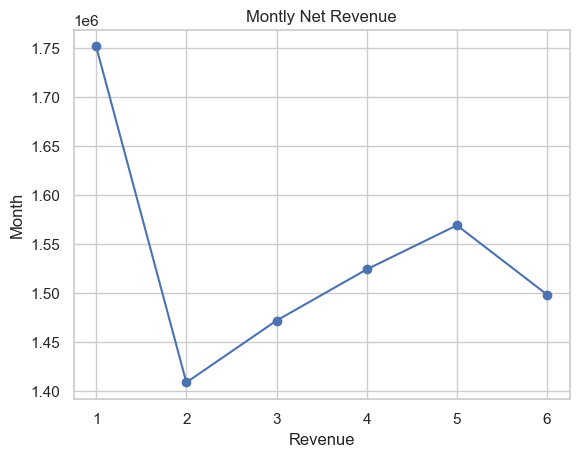

In [9]:
# 6. What’s the monthly sales trend across all stores?

montly_sales = df.groupby("month")["net_revenue"].sum()
print(montly_sales)

montly_sales.plot(kind="line", marker="o", title="Montly Net Revenue")
plt.xlabel("Revenue")
plt.ylabel("Month")
plt.show()

Peak revenue occurred in January, with a dip in February and recovery in later months.

day_of_week
Wednesday    158
Friday       154
Saturday     148
Monday       145
Thursday     136
Tuesday      131
Sunday       128
Name: count, dtype: int64


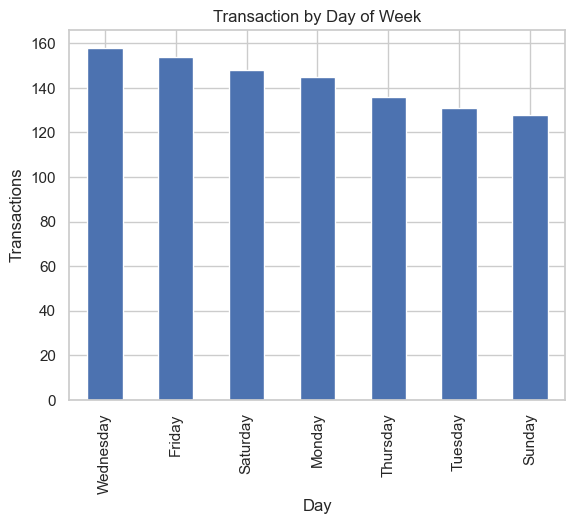

In [10]:
# 7. What are the busiest sales days of the week?

daywise_transactions = df["day_of_week"].value_counts()
print(daywise_transactions)

daywise_transactions.plot(kind="bar", title="Transaction by Day of Week")
plt.xlabel("Day")
plt.ylabel("Transactions")
plt.show()

Wednesday and Friday are the busiest sales days.

category     Clothing  Electronics    Furniture    Groceries
store                                                       
Store_A   586514.3592  544076.4000  540811.9416  527391.3904
Store_B   428732.2032  572005.6552  579985.4424  626413.2952
Store_C   672478.4304  604287.5216  533920.3072  551330.7520
Store_D   553144.3400  601023.0632  747560.9736  554232.4928


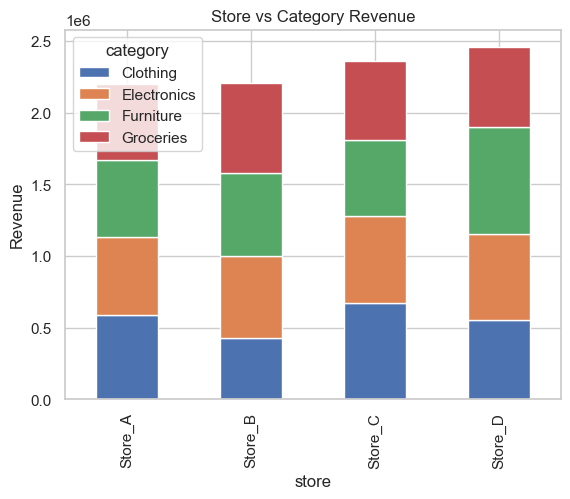

In [11]:
# 8. Compare categories across stores

category_pivot = df.pivot_table(values="net_revenue", index="store", columns="category", aggfunc="sum")
print(category_pivot)

category_pivot.plot(kind="bar", stacked=True, title="Store vs Category Revenue")
plt.ylabel("Revenue")
plt.show()

All stores perform well in Groceries and Furniture, but Store_B and Store_C lead in Electronics.

In [12]:
# 9. Which store offers highest discounts on average?

store_discounts = df.groupby("store")["discount"].mean()
print(store_discounts)

store
Store_A    0.02
Store_B    0.02
Store_C    0.02
Store_D    0.02
Name: discount, dtype: float64


All stores offer similar discounts (~2%).

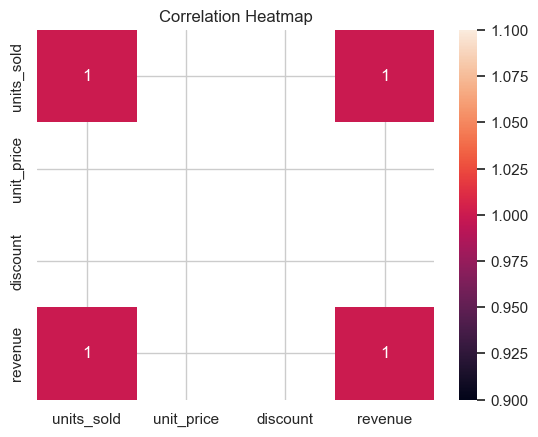

In [13]:
# 10. Correlation of price, units, and discounts

correlation_matrix = df[["units_sold", "unit_price", "discount", "revenue"]].corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()

Units sold and revenue are perfectly correlated (1.0), but no other significant relationships are present due to constant discounts and prices.

### Univariate Analysis

In [14]:
# 1. Store distribution

store_distribution = df["store"].value_counts()
print(store_distribution)

store
Store_D    266
Store_C    251
Store_B    243
Store_A    240
Name: count, dtype: int64


All 4 stores are almost equally represented.

In [15]:
# 2. Category distribution

category_distribution = df["category"].value_counts()
print(category_distribution)

category
Furniture      261
Clothing       252
Electronics    249
Groceries      238
Name: count, dtype: int64


Furniture dominate, followed by clothing and Electronics.

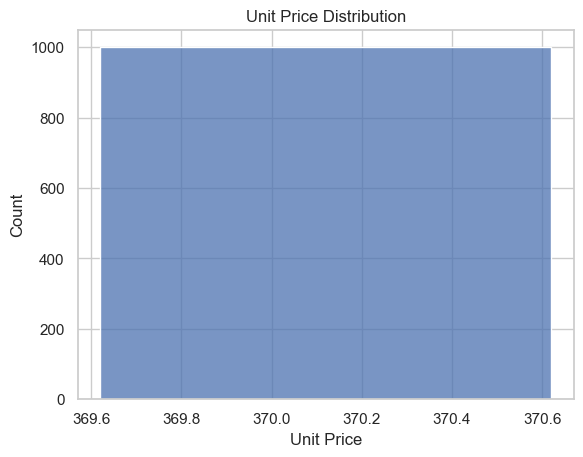

In [16]:
# 3. Unit price histogram

sns.histplot(x="unit_price", data=df)
plt.title("Unit Price Distribution")
plt.xlabel("Unit Price")
plt.show()

Most products are priced in the lower-mid range.

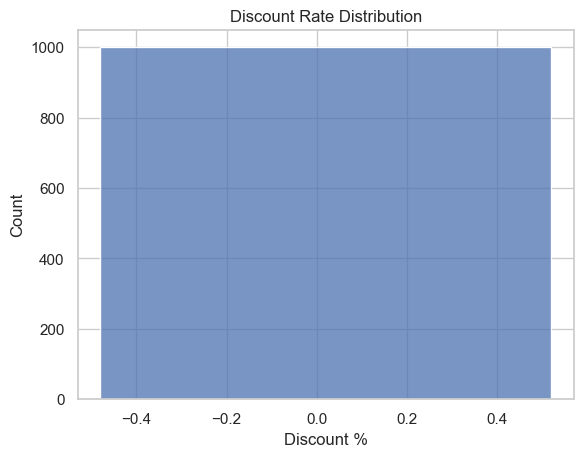

In [17]:
# 4. Discount rate

sns.histplot(x="discount", data=df)
plt.title("Discount Rate Distribution")
plt.xlabel("Discount %")
plt.show()

discount: Tracks discount strategies across products/stores.

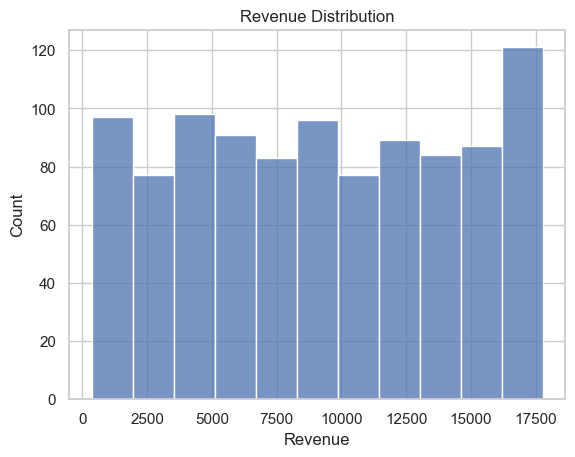

In [18]:
# 5. Revenue distribution

sns.histplot(x="net_revenue", data=df)
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.show()

Net revenue is heavily skewed, with the majority of transactions earning low to moderate revenue.

### Bivariate Analysis

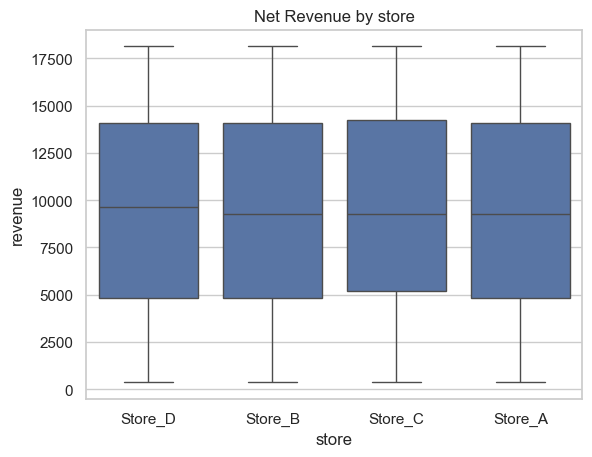

In [24]:
# 1. Store vs Revenue

sns.boxplot(x="store", y="revenue", data=df)
plt.title("Net Revenue by store")
plt.show()

Some stores show higher median revenue and larger variability—indicating performance differences.

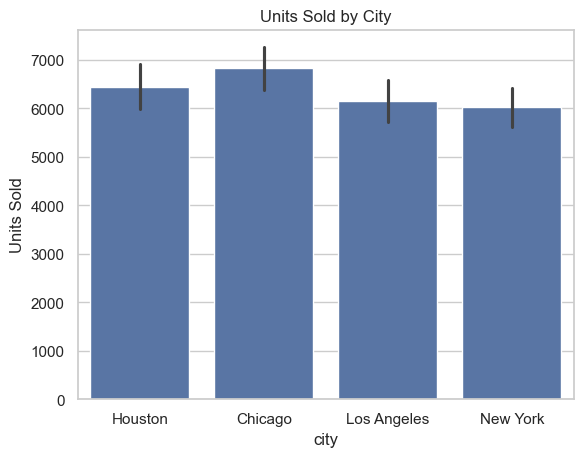

In [31]:
# 2. City vs Units Sold

sns.barplot(x="city", y="units_sold", data=df, estimator="sum")
plt.title("Units Sold by City")
plt.ylabel("Units Sold")
plt.show()

Chicago or other large cities may show greater sales volume.

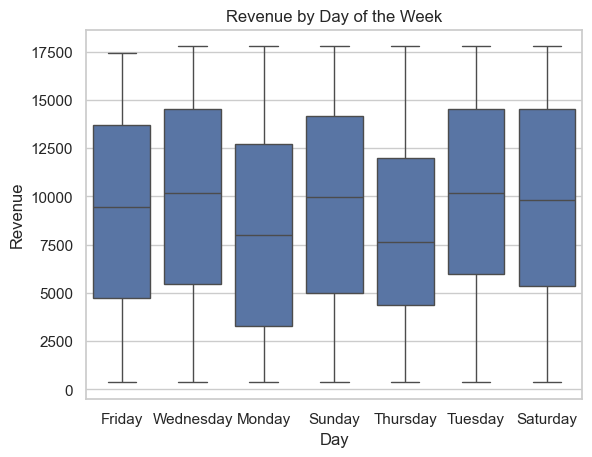

In [34]:
# 3. Day vs Revenue

sns.boxplot(x="day_of_week", y="net_revenue", data=df)
plt.title("Revenue by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.show()

Weekends may generate higher revenue.

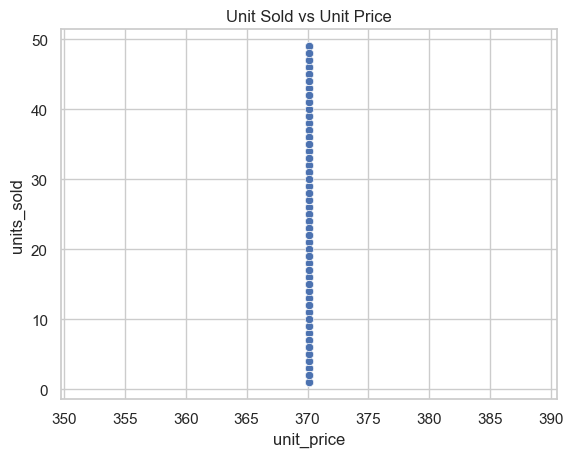

In [39]:
# 4. Units vs Unit Price

sns.scatterplot(x="unit_price", y="units_sold", data=df)
plt.title("Unit Sold vs Unit Price")
plt.show()

Analyzes pricing impact on volume sold.

<Axes: xlabel='category', ylabel='discount'>

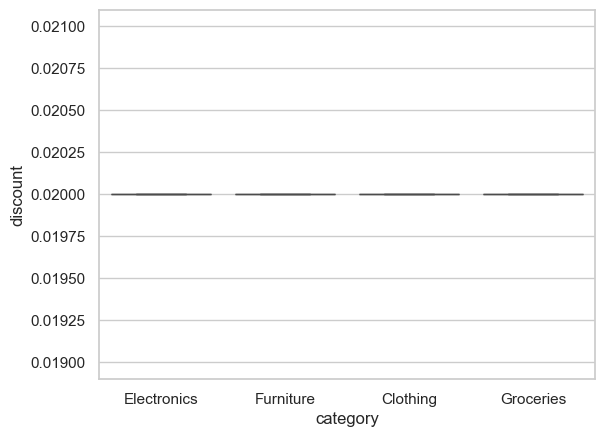

In [43]:
# 5. Category vs Discount

sns.boxplot(x="category", y="discount", data=df)

All items vary the same discount on every category.

### Advance insights

In [45]:
# Profit Simulation (Assume 20% profit margin)

df["profit_estimate"] = df["net_revenue"] * 0.2
profit_by_store = df.groupby("store")["profit_estimate"].sum().sort_values(ascending=False)
print(profit_by_store)

store
Store_D    491192.17392
Store_C    472403.40224
Store_B    441427.31920
Store_A    439758.81824
Name: profit_estimate, dtype: float64


Store_D yields the highest estimated profit.

### Project Summary

Store_D has the highest total revenue and estimated profit, while Store_C has the highest average revenue per transaction.

Furniture and Electronics generate the most net revenue across stores.

Chicago records the most transactions, suggesting a strong customer base or larger market.

All stores maintain a similar average discount rate (~2%), with minimal variation by category.

Wednesday and Friday are the busiest sales days.

January shows a peak in revenue, while February experiences a dip.

Revenue is heavily right-skewed, with most transactions contributing low to moderate amounts.

A 20% profit margin simulation reveals that Store_D leads in profitability, aligned with its high revenue.